In [1]:
#AIC : 모델복잡도 지표 -> 성능비교
#log likelihood(우도) -> MLE(maximum likelihood expectation)

In [2]:
import numpy as np
from scipy.misc import face
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from skimage.data import coins
img = face() #-> read only 로 되어있다.
img = imread('face.png')
img

array([[[0.4745098 , 0.4392157 , 0.5137255 ],
        [0.5411765 , 0.5058824 , 0.5803922 ],
        [0.6       , 0.5647059 , 0.64705884],
        ...,
        [0.46666667, 0.49411765, 0.2901961 ],
        [0.5137255 , 0.53333336, 0.32156864],
        [0.54509807, 0.5647059 , 0.3529412 ]],

       [[0.34901962, 0.32156864, 0.39215687],
        [0.43137255, 0.40392157, 0.4745098 ],
        [0.50980395, 0.47843137, 0.56078434],
        ...,
        [0.4627451 , 0.49019608, 0.2784314 ],
        [0.5254902 , 0.5529412 , 0.34117648],
        [0.57254905, 0.6       , 0.3882353 ]],

       [[0.28627452, 0.25882354, 0.32941177],
        [0.36862746, 0.34117648, 0.4117647 ],
        [0.4509804 , 0.42352942, 0.49411765],
        ...,
        [0.45882353, 0.49411765, 0.2784314 ],
        [0.52156866, 0.5568628 , 0.34117648],
        [0.5647059 , 0.6       , 0.38431373]],

       ...,

       [[0.34117648, 0.41568628, 0.29803923],
        [0.36862746, 0.43137255, 0.31764707],
        [0.41960785, 0

In [3]:
print(img.shape) #768(세로)*1024(가로)*3(rgb컬러) 사이즈로 되어잇는 이미지

(768, 1024, 3)


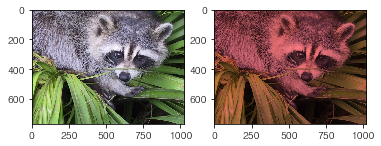

In [4]:
img_tinted = face()*[1,0.5,0.5] #broadcasting rgb값을 변경하겼다.
                     #R G B
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(np.uint8(img_tinted))
plt.show()
#딥러닝 - channel분리를 해서 r,g,b를 각각 떼어서 학습한다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


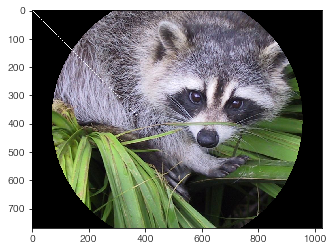

In [5]:
lx,ly,c = img.shape
X,Y = np.ogrid[0:lx, 0:ly] #매쉬그리드라고 보면된다. 그물망 좌표조합을 만들어 준다.
mask = (X-lx/2)**2 + (Y-ly/2)**2 > lx*ly/4 #x^2 + y^2 =2 -> 구를 표현하는 수식
img[mask]=0 #그것보다 큰놈들을 0처리 했더니 검은색으로 변한다.
img[range(400),range(400)]=255 #255 흰색(흰색 점)
plt.imshow(img)

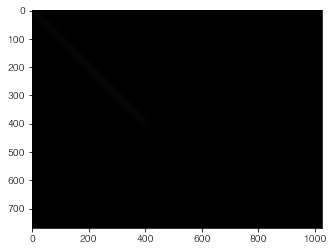

In [6]:
from scipy import ndimage
bluffed_face = ndimage.gaussian_filter(img, sigma=10) #sigma 값을 더 주게 되면 블러처리가 진해진다.
#gaussian_filter 가우시간분포로 주위의 값을 평균을 내어 블러처리 효과를 줄 수 있게 된다.
#주변의 값으로 재표현 된다.색이 바라거나 값이 없는 경우 주변의 값을 고려(분포값 사용)하여 채운다.
#중심으로 가까운부분은 높게주고 멀어질수록 적게주어 한점을 다시 표현하게 된다.
plt.imshow(bluffed_face/255)
plt.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


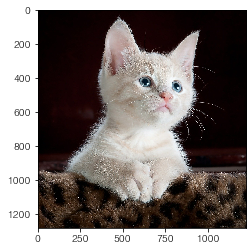

In [7]:
from PIL import Image #pillow -> 이미지를 처리하는 가장 기본 패키지
img = Image.open('kitty.jpg')
plt.imshow(img)
print(type(img))
plt.show()

[-8.33333333e-03  1.25000000e-01 -5.75000000e-01  6.25000000e-01
  6.33333333e-01  4.08176161e-15]
           5         4         3         2
-0.008333 x + 0.125 x - 0.575 x + 0.625 x + 0.6333 x + 4.082e-15
0.4085937499999913
-0.39921874999998797
-89.50000000001238
           30             29             28             27
-7.16e-22 x  - 3.532e-21 x  - 1.736e-20 x  - 8.496e-20 x 
              26             25             24             23
 - 4.132e-19 x  - 1.994e-18 x  - 9.516e-18 x  - 4.476e-17 x 
              22             21             20             19
 - 2.063e-16 x  - 9.223e-16 x  - 3.934e-15 x  - 1.548e-14 x 
             18             17             16             15
 - 5.15e-14 x  - 9.843e-14 x  + 4.796e-13 x  + 8.283e-12 x 
              14             13             12             11
 + 7.662e-11 x  + 5.899e-10 x  + 4.133e-09 x  + 2.714e-08 x 
              10             9             8             7
 + 1.687e-07 x  + 9.879e-07 x + 5.346e-06 x + 2.539e-05 x
          

C:\Users\gram\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


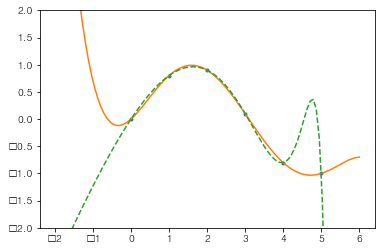

In [8]:
from scipy.optimize import curve_fit
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z = np.polyfit(x,y,5) #3차원 방정식으로 계수를 생성하라
print(z)
p = np.poly1d(z) #계수들을 통해서 방정식을 만들어라 , polynomial 다항식 패키지
print(p)
print(p(0.5)) #매개변수에 값을 넣어주게되면 그값에 의한 예측값이 나온다.
print(p(3.5))
print(p(10))
p30 = np.poly1d(np.polyfit(x,y,30)) #30차원으로 적합 -> 변곡점이 많아진다.
print(p30)
print(p30(4))
xp = np.linspace(-2,6,100)
_ = plt.plot(x,y,'.',xp,p(xp), '-', xp,p30(xp),'--')
plt.ylim(-2,2)
plt.show()
#방정식을 생성하기 때문에 값이 항상 존재한다.

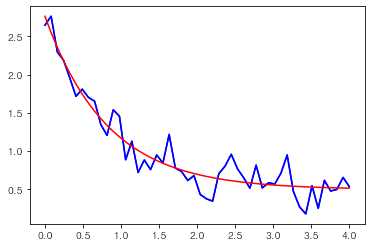

In [9]:
def func(x,a,b,c):
    return a* np.exp(-b*x)+c
xdata = np.linspace(0,4,50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(2020)
y_noise = 0.2*np.random.normal(size=xdata.size)
ydata = y+y_noise #노이즈가 있는 데이터
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov=curve_fit(func, xdata, ydata) #함수가 제공되어야 한다.
popt
plt.plot(xdata, ydata, '-b', label='data')
#plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=5.3f'%tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'r-')

In [10]:
#지역해(변곡점 어느 한부분의 최소값)와 최적해(모든 값들의 최소값)를 이해하기 위한 그래프

C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


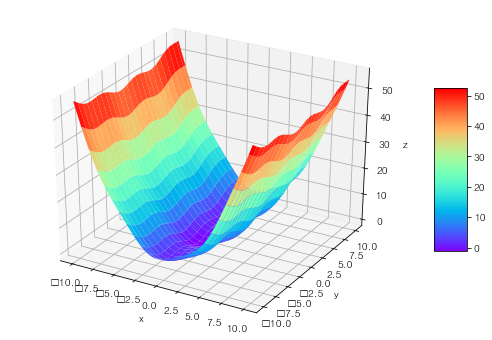

In [11]:
#변곡점의 가장 하단이 최적해이다.
#moment 모멘텀을 주면 가던방향으로 더 진행해본다.
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D #3차원 출력을 위한것
def fm(p):
    x,y = p #실제 데이터
    return (np.sin(x)+ 0.5 * (x ** 2) + np.sin(y) + 0.05 * (y ** 2))
x = np.linspace(-10,10,50) #규칙적인 숫자로
y = np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)#50*50 2500개의 조합을 만들게된다.
Z = fm((X,Y)) #함수에 의해 높이값을 가지게 된다. : 지형이미지 사진을 주면 높낮이에따라서 색이변한다.
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d') #gca를 통해 좌표계를 얻는다.(2차원 좌표계, 3차원 좌표계, 극좌표계, 원통형 좌표계, 구좌표계)
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.rainbow, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)

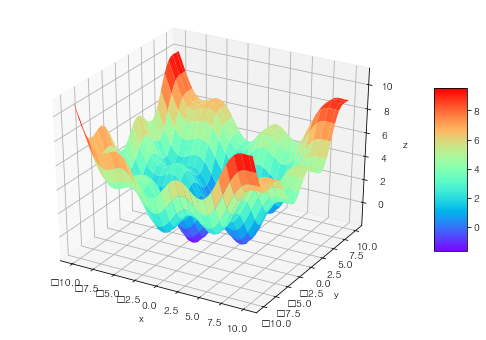

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X, Y = np.meshgrid(x,y)
Z = fm((X,Y)) # 높이값(지형) : 지형이미지 : 높낮이 색이 변함
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection='3d') # 좌표계 : 2차, 3차, 극좌표, 원통형, 구좌표
surf = ax.plot_surface(X,Y,Z, rstride = 2, cstride = 2, cmap=mpl.cm.rainbow, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [13]:
import scipy.optimize as spo
def fo(p):
    x,y = p
    z = (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)
    if output==True:
        print('%8.4f, %8.4f, %8.4f'%(x,y,z))
    return z
output = True
opt1 = spo.brute(fo,((-10,10.1,5),(-10,10.1,5)), finish=None)
#                      x축           y축    으로 그리드 조합을 만든다.
#최적화 중에 brute force 강제대입법이다. (무작위 공격법) - 패스워드를 알아낼때 사용(조합)
#경우의 수가 많기 때문에 시간이 많이 걸린다.
#값의 범위속에서 최적점을 찾아준다.
print(opt1)
opt1 = spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)), finish=None)
print(opt1)
opt2 = spo.fmin(fo,opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
#찾은후 fmin이라는 함수를 통해서 근방을 정밀하게 추적하여 최적점을 구한다.
#xtol=0.001 공차 0.001이 넘으면 같은 값으로 본다.
#maxiter=15, maxfun=20 반복횟수, 평가횟수 -> 정밀하게 찾아준다.
print(opt2)
spo.fmin(fo,(2.0,2.0),maxiter=250)
#머신러닝의 optimization 은 경사하강법이다.(기울기를 따라서 기울기 방향으로 내려간다.)
#기울기가 0이되면 멈춘다. - 최적점을 인식
#기울기 0 = 변곡점 -> 지역해 일수도 있으니 모멘텀을 줘서 더 움직이게 해본다.

-10.0000, -10.0000,  11.0880
-10.0000,  -5.0000,   7.7529
-10.0000,   0.0000,   5.5440
-10.0000,   5.0000,   5.8351
-10.0000,  10.0000,  10.0000
 -5.0000, -10.0000,   7.7529
 -5.0000,  -5.0000,   4.4178
 -5.0000,   0.0000,   2.2089
 -5.0000,   5.0000,   2.5000
 -5.0000,  10.0000,   6.6649
  0.0000, -10.0000,   5.5440
  0.0000,  -5.0000,   2.2089
  0.0000,   0.0000,   0.0000
  0.0000,   5.0000,   0.2911
  0.0000,  10.0000,   4.4560
  5.0000, -10.0000,   5.8351
  5.0000,  -5.0000,   2.5000
  5.0000,   0.0000,   0.2911
  5.0000,   5.0000,   0.5822
  5.0000,  10.0000,   4.7471
 10.0000, -10.0000,  10.0000
 10.0000,  -5.0000,   6.6649
 10.0000,   0.0000,   4.4560
 10.0000,   5.0000,   4.7471
 10.0000,  10.0000,   8.9120
[0. 0.]
-10.0000, -10.0000,  11.0880
-10.0000,  -9.9000,  10.9021
-10.0000,  -9.8000,  10.7125
-10.0000,  -9.7000,  10.5203
-10.0000,  -9.6000,  10.3263
-10.0000,  -9.5000,  10.1317
-10.0000,  -9.4000,   9.9372
-10.0000,  -9.3000,   9.7441
-10.0000,  -9.2000,   9.5531
-10.00

 -9.4000,   4.3000,   4.4016
 -9.4000,   4.4000,   4.4096
 -9.4000,   4.5000,   4.4282
 -9.4000,   4.6000,   4.4575
 -9.4000,   4.7000,   4.4978
 -9.4000,   4.8000,   4.5491
 -9.4000,   4.9000,   4.6113
 -9.4000,   5.0000,   4.6843
 -9.4000,   5.1000,   4.7679
 -9.4000,   5.2000,   4.8618
 -9.4000,   5.3000,   4.9655
 -9.4000,   5.4000,   5.0785
 -9.4000,   5.5000,   5.2002
 -9.4000,   5.6000,   5.3300
 -9.4000,   5.7000,   5.4670
 -9.4000,   5.8000,   5.6106
 -9.4000,   5.9000,   5.7598
 -9.4000,   6.0000,   5.9138
 -9.4000,   6.1000,   6.0716
 -9.4000,   6.2000,   6.2321
 -9.4000,   6.3000,   6.3945
 -9.4000,   6.4000,   6.5578
 -9.4000,   6.5000,   6.7208
 -9.4000,   6.6000,   6.8828
 -9.4000,   6.7000,   7.0426
 -9.4000,   6.8000,   7.1993
 -9.4000,   6.9000,   7.3522
 -9.4000,   7.0000,   7.5002
 -9.4000,   7.1000,   7.6427
 -9.4000,   7.2000,   7.7789
 -9.4000,   7.3000,   7.9082
 -9.4000,   7.4000,   8.0299
 -9.4000,   7.5000,   8.1437
 -9.4000,   7.6000,   8.2491
 -9.4000,   7.

 -8.7000,  -4.6000,   5.1732
 -8.7000,  -4.5000,   5.1116
 -8.7000,  -4.4000,   5.0411
 -8.7000,  -4.3000,   4.9622
 -8.7000,  -4.2000,   4.8751
 -8.7000,  -4.1000,   4.7803
 -8.7000,  -4.0000,   4.6783
 -8.7000,  -3.9000,   4.5698
 -8.7000,  -3.8000,   4.4554
 -8.7000,  -3.7000,   4.3359
 -8.7000,  -3.6000,   4.2121
 -8.7000,  -3.5000,   4.0848
 -8.7000,  -3.4000,   3.9551
 -8.7000,  -3.3000,   3.8238
 -8.7000,  -3.2000,   3.6919
 -8.7000,  -3.1000,   3.5605
 -8.7000,  -3.0000,   3.4304
 -8.7000,  -2.9000,   3.3028
 -8.7000,  -2.8000,   3.1785
 -8.7000,  -2.7000,   3.0587
 -8.7000,  -2.6000,   2.9440
 -8.7000,  -2.5000,   2.8356
 -8.7000,  -2.4000,   2.7341
 -8.7000,  -2.3000,   2.6403
 -8.7000,  -2.2000,   2.5550
 -8.7000,  -2.1000,   2.4788
 -8.7000,  -2.0000,   2.4122
 -8.7000,  -1.9000,   2.3557
 -8.7000,  -1.8000,   2.3097
 -8.7000,  -1.7000,   2.2744
 -8.7000,  -1.6000,   2.2500
 -8.7000,  -1.5000,   2.2365
 -8.7000,  -1.4000,   2.2341
 -8.7000,  -1.3000,   2.2425
 -8.7000,  -1.

 -8.1000,  -7.1000,   4.1021
 -8.1000,  -7.0000,   4.1036
 -8.1000,  -6.9000,   4.1127
 -8.1000,  -6.8000,   4.1285
 -8.1000,  -6.7000,   4.1503
 -8.1000,  -6.6000,   4.1771
 -8.1000,  -6.5000,   4.2080
 -8.1000,  -6.4000,   4.2421
 -8.1000,  -6.3000,   4.2783
 -8.1000,  -6.2000,   4.3157
 -8.1000,  -6.1000,   4.3533
 -8.1000,  -6.0000,   4.3900
 -8.1000,  -5.9000,   4.4250
 -8.1000,  -5.8000,   4.4572
 -8.1000,  -5.7000,   4.4858
 -8.1000,  -5.6000,   4.5099
 -8.1000,  -5.5000,   4.5287
 -8.1000,  -5.4000,   4.5414
 -8.1000,  -5.3000,   4.5474
 -8.1000,  -5.2000,   4.5461
 -8.1000,  -5.1000,   4.5369
 -8.1000,  -5.0000,   4.5195
 -8.1000,  -4.9000,   4.4936
 -8.1000,  -4.8000,   4.4588
 -8.1000,  -4.7000,   4.4150
 -8.1000,  -4.6000,   4.3623
 -8.1000,  -4.5000,   4.3006
 -8.1000,  -4.4000,   4.2302
 -8.1000,  -4.3000,   4.1513
 -8.1000,  -4.2000,   4.0642
 -8.1000,  -4.1000,   3.9694
 -8.1000,  -4.0000,   3.8674
 -8.1000,  -3.9000,   3.7589
 -8.1000,  -3.8000,   3.6445
 -8.1000,  -3.

 -7.5000,   4.7000,   1.9791
 -7.5000,   4.8000,   2.0303
 -7.5000,   4.9000,   2.0925
 -7.5000,   5.0000,   2.1656
 -7.5000,   5.1000,   2.2492
 -7.5000,   5.2000,   2.3430
 -7.5000,   5.3000,   2.4467
 -7.5000,   5.4000,   2.5597
 -7.5000,   5.5000,   2.6815
 -7.5000,   5.6000,   2.8112
 -7.5000,   5.7000,   2.9483
 -7.5000,   5.8000,   3.0919
 -7.5000,   5.9000,   3.2411
 -7.5000,   6.0000,   3.3951
 -7.5000,   6.1000,   3.5528
 -7.5000,   6.2000,   3.7134
 -7.5000,   6.3000,   3.8758
 -7.5000,   6.4000,   4.0390
 -7.5000,   6.5000,   4.2021
 -7.5000,   6.6000,   4.3640
 -7.5000,   6.7000,   4.5238
 -7.5000,   6.8000,   4.6806
 -7.5000,   6.9000,   4.8334
 -7.5000,   7.0000,   4.9815
 -7.5000,   7.1000,   5.1240
 -7.5000,   7.2000,   5.2602
 -7.5000,   7.3000,   5.3894
 -7.5000,   7.4000,   5.5112
 -7.5000,   7.5000,   5.6250
 -7.5000,   7.6000,   5.7304
 -7.5000,   7.7000,   5.8272
 -7.5000,   7.8000,   5.9150
 -7.5000,   7.9000,   5.9939
 -7.5000,   8.0000,   6.0639
 -7.5000,   8.

 -6.9000,   1.6000,   2.9296
 -6.9000,   1.7000,   2.9382
 -6.9000,   1.8000,   2.9379
 -6.9000,   1.9000,   2.9289
 -6.9000,   2.0000,   2.9114
 -6.9000,   2.1000,   2.8858
 -6.9000,   2.2000,   2.8526
 -6.9000,   2.3000,   2.8123
 -6.9000,   2.4000,   2.7655
 -6.9000,   2.5000,   2.7130
 -6.9000,   2.6000,   2.6556
 -6.9000,   2.7000,   2.5939
 -6.9000,   2.8000,   2.5290
 -6.9000,   2.9000,   2.4618
 -6.9000,   3.0000,   2.3932
 -6.9000,   3.1000,   2.3241
 -6.9000,   3.2000,   2.2557
 -6.9000,   3.3000,   2.1888
 -6.9000,   3.4000,   2.1245
 -6.9000,   3.5000,   2.0638
 -6.9000,   3.6000,   2.0075
 -6.9000,   3.7000,   1.9567
 -6.9000,   3.8000,   1.9122
 -6.9000,   3.9000,   1.8748
 -6.9000,   4.0000,   1.8453
 -6.9000,   4.1000,   1.8243
 -6.9000,   4.2000,   1.8125
 -6.9000,   4.3000,   1.8104
 -6.9000,   4.4000,   1.8185
 -6.9000,   4.5000,   1.8370
 -6.9000,   4.6000,   1.8664
 -6.9000,   4.7000,   1.9066
 -6.9000,   4.8000,   1.9579
 -6.9000,   4.9000,   2.0201
 -6.9000,   5.

 -6.1000,  -9.3000,   6.2427
 -6.1000,  -9.2000,   6.0518
 -6.1000,  -9.1000,   5.8641
 -6.1000,  -9.0000,   5.6805
 -6.1000,  -8.9000,   5.5021
 -6.1000,  -8.8000,   5.3297
 -6.1000,  -8.7000,   5.1642
 -6.1000,  -8.6000,   5.0063
 -6.1000,  -8.5000,   4.8567
 -6.1000,  -8.4000,   4.7161
 -6.1000,  -8.3000,   4.5850
 -6.1000,  -8.2000,   4.4639
 -6.1000,  -8.1000,   4.3533
 -6.1000,  -8.0000,   4.2533
 -6.1000,  -7.9000,   4.1642
 -6.1000,  -7.8000,   4.0861
 -6.1000,  -7.7000,   4.0190
 -6.1000,  -7.6000,   3.9627
 -6.1000,  -7.5000,   3.9172
 -6.1000,  -7.4000,   3.8820
 -6.1000,  -7.3000,   3.8567
 -6.1000,  -7.2000,   3.8410
 -6.1000,  -7.1000,   3.8342
 -6.1000,  -7.0000,   3.8357
 -6.1000,  -6.9000,   3.8447
 -6.1000,  -6.8000,   3.8605
 -6.1000,  -6.7000,   3.8823
 -6.1000,  -6.6000,   3.9091
 -6.1000,  -6.5000,   3.9400
 -6.1000,  -6.4000,   3.9741
 -6.1000,  -6.3000,   4.0103
 -6.1000,  -6.2000,   4.0478
 -6.1000,  -6.1000,   4.0853
 -6.1000,  -6.0000,   4.1221
 -6.1000,  -5.

 -5.5000,   4.3000,   2.2264
 -5.5000,   4.4000,   2.2344
 -5.5000,   4.5000,   2.2530
 -5.5000,   4.6000,   2.2823
 -5.5000,   4.7000,   2.3226
 -5.5000,   4.8000,   2.3739
 -5.5000,   4.9000,   2.4361
 -5.5000,   5.0000,   2.5091
 -5.5000,   5.1000,   2.5927
 -5.5000,   5.2000,   2.6866
 -5.5000,   5.3000,   2.7903
 -5.5000,   5.4000,   2.9033
 -5.5000,   5.5000,   3.0250
 -5.5000,   5.6000,   3.1548
 -5.5000,   5.7000,   3.2919
 -5.5000,   5.8000,   3.4354
 -5.5000,   5.9000,   3.5847
 -5.5000,   6.0000,   3.7386
 -5.5000,   6.1000,   3.8964
 -5.5000,   6.2000,   4.0570
 -5.5000,   6.3000,   4.2194
 -5.5000,   6.4000,   4.3826
 -5.5000,   6.5000,   4.5457
 -5.5000,   6.6000,   4.7076
 -5.5000,   6.7000,   4.8674
 -5.5000,   6.8000,   5.0242
 -5.5000,   6.9000,   5.1770
 -5.5000,   7.0000,   5.3250
 -5.5000,   7.1000,   5.4675
 -5.5000,   7.2000,   5.6037
 -5.5000,   7.3000,   5.7330
 -5.5000,   7.4000,   5.8547
 -5.5000,   7.5000,   5.9685
 -5.5000,   7.6000,   6.0740
 -5.5000,   7.

 -4.7000,   2.3000,   3.1146
 -4.7000,   2.4000,   3.0679
 -4.7000,   2.5000,   3.0154
 -4.7000,   2.6000,   2.9579
 -4.7000,   2.7000,   2.8963
 -4.7000,   2.8000,   2.8314
 -4.7000,   2.9000,   2.7642
 -4.7000,   3.0000,   2.6955
 -4.7000,   3.1000,   2.6265
 -4.7000,   3.2000,   2.5580
 -4.7000,   3.3000,   2.4912
 -4.7000,   3.4000,   2.4269
 -4.7000,   3.5000,   2.3661
 -4.7000,   3.6000,   2.3099
 -4.7000,   3.7000,   2.2591
 -4.7000,   3.8000,   2.2146
 -4.7000,   3.9000,   2.1772
 -4.7000,   4.0000,   2.1476
 -4.7000,   4.1000,   2.1266
 -4.7000,   4.2000,   2.1148
 -4.7000,   4.3000,   2.1128
 -4.7000,   4.4000,   2.1208
 -4.7000,   4.5000,   2.1394
 -4.7000,   4.6000,   2.1687
 -4.7000,   4.7000,   2.2090
 -4.7000,   4.8000,   2.2603
 -4.7000,   4.9000,   2.3225
 -4.7000,   5.0000,   2.3955
 -4.7000,   5.1000,   2.4791
 -4.7000,   5.2000,   2.5730
 -4.7000,   5.3000,   2.6767
 -4.7000,   5.4000,   2.7897
 -4.7000,   5.5000,   2.9114
 -4.7000,   5.6000,   3.0412
 -4.7000,   5.

 -4.0000,   6.1000,   3.2351
 -4.0000,   6.2000,   3.3957
 -4.0000,   6.3000,   3.5581
 -4.0000,   6.4000,   3.7214
 -4.0000,   6.5000,   3.8844
 -4.0000,   6.6000,   4.0463
 -4.0000,   6.7000,   4.2062
 -4.0000,   6.8000,   4.3629
 -4.0000,   6.9000,   4.5157
 -4.0000,   7.0000,   4.6638
 -4.0000,   7.1000,   4.8063
 -4.0000,   7.2000,   4.9425
 -4.0000,   7.3000,   5.0717
 -4.0000,   7.4000,   5.1935
 -4.0000,   7.5000,   5.3073
 -4.0000,   7.6000,   5.4127
 -4.0000,   7.7000,   5.5095
 -4.0000,   7.8000,   5.5973
 -4.0000,   7.9000,   5.6762
 -4.0000,   8.0000,   5.7462
 -4.0000,   8.1000,   5.8072
 -4.0000,   8.2000,   5.8595
 -4.0000,   8.3000,   5.9035
 -4.0000,   8.4000,   5.9394
 -4.0000,   8.5000,   5.9678
 -4.0000,   8.6000,   5.9892
 -4.0000,   8.7000,   6.0043
 -4.0000,   8.8000,   6.0137
 -4.0000,   8.9000,   6.0183
 -4.0000,   9.0000,   6.0189
 -4.0000,   9.1000,   6.0164
 -4.0000,   9.2000,   6.0117
 -4.0000,   9.3000,   6.0058
 -4.0000,   9.4000,   5.9996
 -4.0000,   9.

 -3.3000,   5.0000,   0.9933
 -3.3000,   5.1000,   1.0769
 -3.3000,   5.2000,   1.1708
 -3.3000,   5.3000,   1.2745
 -3.3000,   5.4000,   1.3875
 -3.3000,   5.5000,   1.5092
 -3.3000,   5.6000,   1.6390
 -3.3000,   5.7000,   1.7761
 -3.3000,   5.8000,   1.9196
 -3.3000,   5.9000,   2.0689
 -3.3000,   6.0000,   2.2228
 -3.3000,   6.1000,   2.3806
 -3.3000,   6.2000,   2.5412
 -3.3000,   6.3000,   2.7036
 -3.3000,   6.4000,   2.8668
 -3.3000,   6.5000,   3.0299
 -3.3000,   6.6000,   3.1918
 -3.3000,   6.7000,   3.3516
 -3.3000,   6.8000,   3.5084
 -3.3000,   6.9000,   3.6612
 -3.3000,   7.0000,   3.8092
 -3.3000,   7.1000,   3.9517
 -3.3000,   7.2000,   4.0879
 -3.3000,   7.3000,   4.2172
 -3.3000,   7.4000,   4.3390
 -3.3000,   7.5000,   4.4527
 -3.3000,   7.6000,   4.5582
 -3.3000,   7.7000,   4.6549
 -3.3000,   7.8000,   4.7428
 -3.3000,   7.9000,   4.8217
 -3.3000,   8.0000,   4.8916
 -3.3000,   8.1000,   4.9526
 -3.3000,   8.2000,   5.0050
 -3.3000,   8.3000,   5.0489
 -3.3000,   8.

 -2.6000,   2.4000,   0.7860
 -2.6000,   2.5000,   0.7335
 -2.6000,   2.6000,   0.6760
 -2.6000,   2.7000,   0.6144
 -2.6000,   2.8000,   0.5495
 -2.6000,   2.9000,   0.4822
 -2.6000,   3.0000,   0.4136
 -2.6000,   3.1000,   0.3446
 -2.6000,   3.2000,   0.2761
 -2.6000,   3.3000,   0.2093
 -2.6000,   3.4000,   0.1450
 -2.6000,   3.5000,   0.0842
 -2.6000,   3.6000,   0.0280
 -2.6000,   3.7000,  -0.0228
 -2.6000,   3.8000,  -0.0674
 -2.6000,   3.9000,  -0.1048
 -2.6000,   4.0000,  -0.1343
 -2.6000,   4.1000,  -0.1553
 -2.6000,   4.2000,  -0.1671
 -2.6000,   4.3000,  -0.1692
 -2.6000,   4.4000,  -0.1611
 -2.6000,   4.5000,  -0.1425
 -2.6000,   4.6000,  -0.1132
 -2.6000,   4.7000,  -0.0729
 -2.6000,   4.8000,  -0.0217
 -2.6000,   4.9000,   0.0405
 -2.6000,   5.0000,   0.1136
 -2.6000,   5.1000,   0.1972
 -2.6000,   5.2000,   0.2910
 -2.6000,   5.3000,   0.3947
 -2.6000,   5.4000,   0.5077
 -2.6000,   5.5000,   0.6295
 -2.6000,   5.6000,   0.7592
 -2.6000,   5.7000,   0.8963
 -2.6000,   5.

 -1.9000,  -3.8000,   0.5681
 -1.9000,  -3.7000,   0.4485
 -1.9000,  -3.6000,   0.3247
 -1.9000,  -3.5000,   0.1975
 -1.9000,  -3.4000,   0.0677
 -1.9000,  -3.3000,  -0.0636
 -1.9000,  -3.2000,  -0.1954
 -1.9000,  -3.1000,  -0.3269
 -1.9000,  -3.0000,  -0.4569
 -1.9000,  -2.9000,  -0.5845
 -1.9000,  -2.8000,  -0.7088
 -1.9000,  -2.7000,  -0.8287
 -1.9000,  -2.6000,  -0.9433
 -1.9000,  -2.5000,  -1.0518
 -1.9000,  -2.4000,  -1.1533
 -1.9000,  -2.3000,  -1.2470
 -1.9000,  -2.2000,  -1.3323
 -1.9000,  -2.1000,  -1.4085
 -1.9000,  -2.0000,  -1.4751
 -1.9000,  -1.9000,  -1.5316
 -1.9000,  -1.8000,  -1.5776
 -1.9000,  -1.7000,  -1.6130
 -1.9000,  -1.6000,  -1.6374
 -1.9000,  -1.5000,  -1.6508
 -1.9000,  -1.4000,  -1.6532
 -1.9000,  -1.3000,  -1.6449
 -1.9000,  -1.2000,  -1.6258
 -1.9000,  -1.1000,  -1.5965
 -1.9000,  -1.0000,  -1.5573
 -1.9000,  -0.9000,  -1.5086
 -1.9000,  -0.8000,  -1.4512
 -1.9000,  -0.7000,  -1.3855
 -1.9000,  -0.6000,  -1.3124
 -1.9000,  -0.5000,  -1.2327
 -1.9000,  -0.

 -1.2000,   3.5000,  -0.5983
 -1.2000,   3.6000,  -0.6546
 -1.2000,   3.7000,  -0.7054
 -1.2000,   3.8000,  -0.7499
 -1.2000,   3.9000,  -0.7873
 -1.2000,   4.0000,  -0.8168
 -1.2000,   4.1000,  -0.8378
 -1.2000,   4.2000,  -0.8496
 -1.2000,   4.3000,  -0.8517
 -1.2000,   4.4000,  -0.8436
 -1.2000,   4.5000,  -0.8251
 -1.2000,   4.6000,  -0.7957
 -1.2000,   4.7000,  -0.7555
 -1.2000,   4.8000,  -0.7042
 -1.2000,   4.9000,  -0.6420
 -1.2000,   5.0000,  -0.5690
 -1.2000,   5.1000,  -0.4854
 -1.2000,   5.2000,  -0.3915
 -1.2000,   5.3000,  -0.2878
 -1.2000,   5.4000,  -0.1748
 -1.2000,   5.5000,  -0.0531
 -1.2000,   5.6000,   0.0767
 -1.2000,   5.7000,   0.2138
 -1.2000,   5.8000,   0.3574
 -1.2000,   5.9000,   0.5066
 -1.2000,   6.0000,   0.6605
 -1.2000,   6.1000,   0.8183
 -1.2000,   6.2000,   0.9789
 -1.2000,   6.3000,   1.1413
 -1.2000,   6.4000,   1.3045
 -1.2000,   6.5000,   1.4676
 -1.2000,   6.6000,   1.6295
 -1.2000,   6.7000,   1.7893
 -1.2000,   6.8000,   1.9461
 -1.2000,   6.

 -0.5000,   1.5000,   0.6431
 -0.5000,   1.6000,   0.6606
 -0.5000,   1.7000,   0.6692
 -0.5000,   1.8000,   0.6689
 -0.5000,   1.9000,   0.6599
 -0.5000,   2.0000,   0.6424
 -0.5000,   2.1000,   0.6168
 -0.5000,   2.2000,   0.5836
 -0.5000,   2.3000,   0.5433
 -0.5000,   2.4000,   0.4965
 -0.5000,   2.5000,   0.4440
 -0.5000,   2.6000,   0.3866
 -0.5000,   2.7000,   0.3250
 -0.5000,   2.8000,   0.2601
 -0.5000,   2.9000,   0.1928
 -0.5000,   3.0000,   0.1242
 -0.5000,   3.1000,   0.0552
 -0.5000,   3.2000,  -0.0133
 -0.5000,   3.3000,  -0.0802
 -0.5000,   3.4000,  -0.1445
 -0.5000,   3.5000,  -0.2052
 -0.5000,   3.6000,  -0.2614
 -0.5000,   3.7000,  -0.3123
 -0.5000,   3.8000,  -0.3568
 -0.5000,   3.9000,  -0.3942
 -0.5000,   4.0000,  -0.4237
 -0.5000,   4.1000,  -0.4447
 -0.5000,   4.2000,  -0.4565
 -0.5000,   4.3000,  -0.4586
 -0.5000,   4.4000,  -0.4505
 -0.5000,   4.5000,  -0.4320
 -0.5000,   4.6000,  -0.4026
 -0.5000,   4.7000,  -0.3623
 -0.5000,   4.8000,  -0.3111
 -0.5000,   4.

  0.3000,  -5.0000,   2.5089
  0.3000,  -4.9000,   2.4830
  0.3000,  -4.8000,   2.4482
  0.3000,  -4.7000,   2.4044
  0.3000,  -4.6000,   2.3517
  0.3000,  -4.5000,   2.2901
  0.3000,  -4.4000,   2.2196
  0.3000,  -4.3000,   2.1407
  0.3000,  -4.2000,   2.0536
  0.3000,  -4.1000,   1.9588
  0.3000,  -4.0000,   1.8568
  0.3000,  -3.9000,   1.7483
  0.3000,  -3.8000,   1.6339
  0.3000,  -3.7000,   1.5144
  0.3000,  -3.6000,   1.3905
  0.3000,  -3.5000,   1.2633
  0.3000,  -3.4000,   1.1336
  0.3000,  -3.3000,   1.0023
  0.3000,  -3.2000,   0.8704
  0.3000,  -3.1000,   0.7389
  0.3000,  -3.0000,   0.6089
  0.3000,  -2.9000,   0.4813
  0.3000,  -2.8000,   0.3570
  0.3000,  -2.7000,   0.2371
  0.3000,  -2.6000,   0.1225
  0.3000,  -2.5000,   0.0140
  0.3000,  -2.4000,  -0.0874
  0.3000,  -2.3000,  -0.1812
  0.3000,  -2.2000,  -0.2665
  0.3000,  -2.1000,  -0.3427
  0.3000,  -2.0000,  -0.4093
  0.3000,  -1.9000,  -0.4658
  0.3000,  -1.8000,  -0.5118
  0.3000,  -1.7000,  -0.5471
  0.3000,  -1.

  1.0000,   5.3000,   1.4637
  1.0000,   5.4000,   1.5767
  1.0000,   5.5000,   1.6984
  1.0000,   5.6000,   1.8282
  1.0000,   5.7000,   1.9653
  1.0000,   5.8000,   2.1089
  1.0000,   5.9000,   2.2581
  1.0000,   6.0000,   2.4121
  1.0000,   6.1000,   2.5698
  1.0000,   6.2000,   2.7304
  1.0000,   6.3000,   2.8928
  1.0000,   6.4000,   3.0560
  1.0000,   6.5000,   3.2191
  1.0000,   6.6000,   3.3810
  1.0000,   6.7000,   3.5408
  1.0000,   6.8000,   3.6976
  1.0000,   6.9000,   3.8504
  1.0000,   7.0000,   3.9985
  1.0000,   7.1000,   4.1409
  1.0000,   7.2000,   4.2771
  1.0000,   7.3000,   4.4064
  1.0000,   7.4000,   4.5282
  1.0000,   7.5000,   4.6420
  1.0000,   7.6000,   4.7474
  1.0000,   7.7000,   4.8441
  1.0000,   7.8000,   4.9320
  1.0000,   7.9000,   5.0109
  1.0000,   8.0000,   5.0808
  1.0000,   8.1000,   5.1419
  1.0000,   8.2000,   5.1942
  1.0000,   8.3000,   5.2381
  1.0000,   8.4000,   5.2741
  1.0000,   8.5000,   5.3025
  1.0000,   8.6000,   5.3239
  1.0000,   8.

  1.8000,   2.3000,   2.1461
  1.8000,   2.4000,   2.0993
  1.8000,   2.5000,   2.0468
  1.8000,   2.6000,   1.9893
  1.8000,   2.7000,   1.9277
  1.8000,   2.8000,   1.8628
  1.8000,   2.9000,   1.7956
  1.8000,   3.0000,   1.7270
  1.8000,   3.1000,   1.6579
  1.8000,   3.2000,   1.5895
  1.8000,   3.3000,   1.5226
  1.8000,   3.4000,   1.4583
  1.8000,   3.5000,   1.3976
  1.8000,   3.6000,   1.3413
  1.8000,   3.7000,   1.2905
  1.8000,   3.8000,   1.2460
  1.8000,   3.9000,   1.2086
  1.8000,   4.0000,   1.1790
  1.8000,   4.1000,   1.1581
  1.8000,   4.2000,   1.1463
  1.8000,   4.3000,   1.1442
  1.8000,   4.4000,   1.1522
  1.8000,   4.5000,   1.1708
  1.8000,   4.6000,   1.2002
  1.8000,   4.7000,   1.2404
  1.8000,   4.8000,   1.2917
  1.8000,   4.9000,   1.3539
  1.8000,   5.0000,   1.4269
  1.8000,   5.1000,   1.5105
  1.8000,   5.2000,   1.6044
  1.8000,   5.3000,   1.7081
  1.8000,   5.4000,   1.8211
  1.8000,   5.5000,   1.9428
  1.8000,   5.6000,   2.0726
  1.8000,   5.

  2.5000,   7.2000,   4.2966
  2.5000,   7.3000,   4.4259
  2.5000,   7.4000,   4.5477
  2.5000,   7.5000,   4.6615
  2.5000,   7.6000,   4.7669
  2.5000,   7.7000,   4.8636
  2.5000,   7.8000,   4.9515
  2.5000,   7.9000,   5.0304
  2.5000,   8.0000,   5.1003
  2.5000,   8.1000,   5.1614
  2.5000,   8.2000,   5.2137
  2.5000,   8.3000,   5.2576
  2.5000,   8.4000,   5.2936
  2.5000,   8.5000,   5.3220
  2.5000,   8.6000,   5.3434
  2.5000,   8.7000,   5.3584
  2.5000,   8.8000,   5.3679
  2.5000,   8.9000,   5.3725
  2.5000,   9.0000,   5.3731
  2.5000,   9.1000,   5.3706
  2.5000,   9.2000,   5.3659
  2.5000,   9.3000,   5.3599
  2.5000,   9.4000,   5.3537
  2.5000,   9.5000,   5.3483
  2.5000,   9.6000,   5.3446
  2.5000,   9.7000,   5.3437
  2.5000,   9.8000,   5.3465
  2.5000,   9.9000,   5.3539
  2.5000,  10.0000,   5.3670
  2.6000, -10.0000,   6.3975
  2.6000,  -9.9000,   6.2115
  2.6000,  -9.8000,   6.0220
  2.6000,  -9.7000,   5.8298
  2.6000,  -9.6000,   5.6358
  2.6000,  -9.

  3.3000,   0.7000,   1.0555
  3.3000,   0.8000,   1.1361
  3.3000,   0.9000,   1.2106
  3.3000,   1.0000,   1.2782
  3.3000,   1.1000,   1.3385
  3.3000,   1.2000,   1.3908
  3.3000,   1.3000,   1.4348
  3.3000,   1.4000,   1.4702
  3.3000,   1.5000,   1.4967
  3.3000,   1.6000,   1.5143
  3.3000,   1.7000,   1.5229
  3.3000,   1.8000,   1.5226
  3.3000,   1.9000,   1.5136
  3.3000,   2.0000,   1.4961
  3.3000,   2.1000,   1.4705
  3.3000,   2.2000,   1.4373
  3.3000,   2.3000,   1.3970
  3.3000,   2.4000,   1.3502
  3.3000,   2.5000,   1.2977
  3.3000,   2.6000,   1.2403
  3.3000,   2.7000,   1.1786
  3.3000,   2.8000,   1.1137
  3.3000,   2.9000,   1.0465
  3.3000,   3.0000,   0.9779
  3.3000,   3.1000,   0.9088
  3.3000,   3.2000,   0.8404
  3.3000,   3.3000,   0.7735
  3.3000,   3.4000,   0.7092
  3.3000,   3.5000,   0.6485
  3.3000,   3.6000,   0.5922
  3.3000,   3.7000,   0.5414
  3.3000,   3.8000,   0.4969
  3.3000,   3.9000,   0.4595
  3.3000,   4.0000,   0.4300
  3.3000,   4.

  4.1000,  -6.1000,   2.0649
  4.1000,  -6.0000,   2.1016
  4.1000,  -5.9000,   2.1366
  4.1000,  -5.8000,   2.1688
  4.1000,  -5.7000,   2.1974
  4.1000,  -5.6000,   2.2215
  4.1000,  -5.5000,   2.2403
  4.1000,  -5.4000,   2.2530
  4.1000,  -5.3000,   2.2590
  4.1000,  -5.2000,   2.2577
  4.1000,  -5.1000,   2.2485
  4.1000,  -5.0000,   2.2311
  4.1000,  -4.9000,   2.2052
  4.1000,  -4.8000,   2.1704
  4.1000,  -4.7000,   2.1266
  4.1000,  -4.6000,   2.0739
  4.1000,  -4.5000,   2.0123
  4.1000,  -4.4000,   1.9418
  4.1000,  -4.3000,   1.8629
  4.1000,  -4.2000,   1.7758
  4.1000,  -4.1000,   1.6810
  4.1000,  -4.0000,   1.5790
  4.1000,  -3.9000,   1.4705
  4.1000,  -3.8000,   1.3561
  4.1000,  -3.7000,   1.2366
  4.1000,  -3.6000,   1.1127
  4.1000,  -3.5000,   0.9855
  4.1000,  -3.4000,   0.8558
  4.1000,  -3.3000,   0.7245
  4.1000,  -3.2000,   0.5926
  4.1000,  -3.1000,   0.4611
  4.1000,  -3.0000,   0.3311
  4.1000,  -2.9000,   0.2035
  4.1000,  -2.8000,   0.0792
  4.1000,  -2.

  4.8000,   2.3000,   1.1660
  4.8000,   2.4000,   1.1193
  4.8000,   2.5000,   1.0668
  4.8000,   2.6000,   1.0093
  4.8000,   2.7000,   0.9477
  4.8000,   2.8000,   0.8828
  4.8000,   2.9000,   0.8156
  4.8000,   3.0000,   0.7470
  4.8000,   3.1000,   0.6779
  4.8000,   3.2000,   0.6095
  4.8000,   3.3000,   0.5426
  4.8000,   3.4000,   0.4783
  4.8000,   3.5000,   0.4176
  4.8000,   3.6000,   0.3613
  4.8000,   3.7000,   0.3105
  4.8000,   3.8000,   0.2660
  4.8000,   3.9000,   0.2286
  4.8000,   4.0000,   0.1990
  4.8000,   4.1000,   0.1781
  4.8000,   4.2000,   0.1663
  4.8000,   4.3000,   0.1642
  4.8000,   4.4000,   0.1722
  4.8000,   4.5000,   0.1908
  4.8000,   4.6000,   0.2201
  4.8000,   4.7000,   0.2604
  4.8000,   4.8000,   0.3117
  4.8000,   4.9000,   0.3739
  4.8000,   5.0000,   0.4469
  4.8000,   5.1000,   0.5305
  4.8000,   5.2000,   0.6244
  4.8000,   5.3000,   0.7281
  4.8000,   5.4000,   0.8411
  4.8000,   5.5000,   0.9628
  4.8000,   5.6000,   1.0926
  4.8000,   5.

  5.6000,  -6.1000,   2.9794
  5.6000,  -6.0000,   3.0161
  5.6000,  -5.9000,   3.0511
  5.6000,  -5.8000,   3.0833
  5.6000,  -5.7000,   3.1119
  5.6000,  -5.6000,   3.1360
  5.6000,  -5.5000,   3.1548
  5.6000,  -5.4000,   3.1675
  5.6000,  -5.3000,   3.1735
  5.6000,  -5.2000,   3.1722
  5.6000,  -5.1000,   3.1630
  5.6000,  -5.0000,   3.1457
  5.6000,  -4.9000,   3.1197
  5.6000,  -4.8000,   3.0849
  5.6000,  -4.7000,   3.0412
  5.6000,  -4.6000,   2.9884
  5.6000,  -4.5000,   2.9268
  5.6000,  -4.4000,   2.8563
  5.6000,  -4.3000,   2.7774
  5.6000,  -4.2000,   2.6903
  5.6000,  -4.1000,   2.5955
  5.6000,  -4.0000,   2.4935
  5.6000,  -3.9000,   2.3850
  5.6000,  -3.8000,   2.2706
  5.6000,  -3.7000,   2.1511
  5.6000,  -3.6000,   2.0273
  5.6000,  -3.5000,   1.9000
  5.6000,  -3.4000,   1.7703
  5.6000,  -3.3000,   1.6390
  5.6000,  -3.2000,   1.5071
  5.6000,  -3.1000,   1.3757
  5.6000,  -3.0000,   1.2456
  5.6000,  -2.9000,   1.1180
  5.6000,  -2.8000,   0.9937
  5.6000,  -2.

  6.4000,   9.9000,   6.6075
  6.4000,  10.0000,   6.6205
  6.5000, -10.0000,   7.8716
  6.5000,  -9.9000,   7.6857
  6.5000,  -9.8000,   7.4961
  6.5000,  -9.7000,   7.3039
  6.5000,  -9.6000,   7.1099
  6.5000,  -9.5000,   6.9153
  6.5000,  -9.4000,   6.7208
  6.5000,  -9.3000,   6.5277
  6.5000,  -9.2000,   6.3367
  6.5000,  -9.1000,   6.1490
  6.5000,  -9.0000,   5.9655
  6.5000,  -8.9000,   5.7871
  6.5000,  -8.8000,   5.6147
  6.5000,  -8.7000,   5.4492
  6.5000,  -8.6000,   5.2912
  6.5000,  -8.5000,   5.1416
  6.5000,  -8.4000,   5.0010
  6.5000,  -8.3000,   4.8699
  6.5000,  -8.2000,   4.7489
  6.5000,  -8.1000,   4.6382
  6.5000,  -8.0000,   4.5383
  6.5000,  -7.9000,   4.4492
  6.5000,  -7.8000,   4.3711
  6.5000,  -7.7000,   4.3040
  6.5000,  -7.6000,   4.2477
  6.5000,  -7.5000,   4.2021
  6.5000,  -7.4000,   4.1669
  6.5000,  -7.3000,   4.1417
  6.5000,  -7.2000,   4.1260
  6.5000,  -7.1000,   4.1192
  6.5000,  -7.0000,   4.1206
  6.5000,  -6.9000,   4.1297
  6.5000,  -6.

  7.2000,   0.2000,   3.5863
  7.2000,   0.3000,   3.6857
  7.2000,   0.4000,   3.7831
  7.2000,   0.5000,   3.8776
  7.2000,   0.6000,   3.9683
  7.2000,   0.7000,   4.0544
  7.2000,   0.8000,   4.1350
  7.2000,   0.9000,   4.2095
  7.2000,   1.0000,   4.2771
  7.2000,   1.1000,   4.3374
  7.2000,   1.2000,   4.3897
  7.2000,   1.3000,   4.4337
  7.2000,   1.4000,   4.4691
  7.2000,   1.5000,   4.4957
  7.2000,   1.6000,   4.5132
  7.2000,   1.7000,   4.5218
  7.2000,   1.8000,   4.5215
  7.2000,   1.9000,   4.5125
  7.2000,   2.0000,   4.4950
  7.2000,   2.1000,   4.4694
  7.2000,   2.2000,   4.4362
  7.2000,   2.3000,   4.3959
  7.2000,   2.4000,   4.3491
  7.2000,   2.5000,   4.2966
  7.2000,   2.6000,   4.2392
  7.2000,   2.7000,   4.1775
  7.2000,   2.8000,   4.1127
  7.2000,   2.9000,   4.0454
  7.2000,   3.0000,   3.9768
  7.2000,   3.1000,   3.9077
  7.2000,   3.2000,   3.8393
  7.2000,   3.3000,   3.7724
  7.2000,   3.4000,   3.7081
  7.2000,   3.5000,   3.6474
  7.2000,   3.

  8.0000,  -5.9000,   6.3037
  8.0000,  -5.8000,   6.3360
  8.0000,  -5.7000,   6.3645
  8.0000,  -5.6000,   6.3886
  8.0000,  -5.5000,   6.4074
  8.0000,  -5.4000,   6.4201
  8.0000,  -5.3000,   6.4261
  8.0000,  -5.2000,   6.4248
  8.0000,  -5.1000,   6.4157
  8.0000,  -5.0000,   6.3983
  8.0000,  -4.9000,   6.3723
  8.0000,  -4.8000,   6.3375
  8.0000,  -4.7000,   6.2938
  8.0000,  -4.6000,   6.2410
  8.0000,  -4.5000,   6.1794
  8.0000,  -4.4000,   6.1090
  8.0000,  -4.3000,   6.0300
  8.0000,  -4.2000,   5.9429
  8.0000,  -4.1000,   5.8481
  8.0000,  -4.0000,   5.7462
  8.0000,  -3.9000,   5.6376
  8.0000,  -3.8000,   5.5232
  8.0000,  -3.7000,   5.4037
  8.0000,  -3.6000,   5.2799
  8.0000,  -3.5000,   5.1526
  8.0000,  -3.4000,   5.0229
  8.0000,  -3.3000,   4.8916
  8.0000,  -3.2000,   4.7597
  8.0000,  -3.1000,   4.6283
  8.0000,  -3.0000,   4.4982
  8.0000,  -2.9000,   4.3706
  8.0000,  -2.8000,   4.2464
  8.0000,  -2.7000,   4.1265
  8.0000,  -2.6000,   4.0119
  8.0000,  -2.

  8.6000,  -6.3000,   6.4001
  8.6000,  -6.2000,   6.4375
  8.6000,  -6.1000,   6.4751
  8.6000,  -6.0000,   6.5118
  8.6000,  -5.9000,   6.5468
  8.6000,  -5.8000,   6.5790
  8.6000,  -5.7000,   6.6076
  8.6000,  -5.6000,   6.6317
  8.6000,  -5.5000,   6.6504
  8.6000,  -5.4000,   6.6632
  8.6000,  -5.3000,   6.6692
  8.6000,  -5.2000,   6.6679
  8.6000,  -5.1000,   6.6587
  8.6000,  -5.0000,   6.6413
  8.6000,  -4.9000,   6.6153
  8.6000,  -4.8000,   6.5806
  8.6000,  -4.7000,   6.5368
  8.6000,  -4.6000,   6.4841
  8.6000,  -4.5000,   6.4224
  8.6000,  -4.4000,   6.3520
  8.6000,  -4.3000,   6.2731
  8.6000,  -4.2000,   6.1860
  8.6000,  -4.1000,   6.0912
  8.6000,  -4.0000,   5.9892
  8.6000,  -3.9000,   5.8807
  8.6000,  -3.8000,   5.7663
  8.6000,  -3.7000,   5.6467
  8.6000,  -3.6000,   5.5229
  8.6000,  -3.5000,   5.3957
  8.6000,  -3.4000,   5.2659
  8.6000,  -3.3000,   5.1346
  8.6000,  -3.2000,   5.0028
  8.6000,  -3.1000,   4.8713
  8.6000,  -3.0000,   4.7413
  8.6000,  -2.

  9.3000,   1.0000,   5.3404
  9.3000,   1.1000,   5.4007
  9.3000,   1.2000,   5.4530
  9.3000,   1.3000,   5.4970
  9.3000,   1.4000,   5.5324
  9.3000,   1.5000,   5.5589
  9.3000,   1.6000,   5.5765
  9.3000,   1.7000,   5.5851
  9.3000,   1.8000,   5.5848
  9.3000,   1.9000,   5.5758
  9.3000,   2.0000,   5.5583
  9.3000,   2.1000,   5.5327
  9.3000,   2.2000,   5.4995
  9.3000,   2.3000,   5.4592
  9.3000,   2.4000,   5.4124
  9.3000,   2.5000,   5.3599
  9.3000,   2.6000,   5.3025
  9.3000,   2.7000,   5.2408
  9.3000,   2.8000,   5.1759
  9.3000,   2.9000,   5.1087
  9.3000,   3.0000,   5.0401
  9.3000,   3.1000,   4.9710
  9.3000,   3.2000,   4.9026
  9.3000,   3.3000,   4.8357
  9.3000,   3.4000,   4.7714
  9.3000,   3.5000,   4.7107
  9.3000,   3.6000,   4.6544
  9.3000,   3.7000,   4.6036
  9.3000,   3.8000,   4.5591
  9.3000,   3.9000,   4.5217
  9.3000,   4.0000,   4.4922
  9.3000,   4.1000,   4.4712
  9.3000,   4.2000,   4.4594
  9.3000,   4.3000,   4.4573
  9.3000,   4.

 10.0000,   2.8000,   5.1830
 10.0000,   2.9000,   5.1157
 10.0000,   3.0000,   5.0471
 10.0000,   3.1000,   4.9781
 10.0000,   3.2000,   4.9096
 10.0000,   3.3000,   4.8427
 10.0000,   3.4000,   4.7784
 10.0000,   3.5000,   4.7177
 10.0000,   3.6000,   4.6615
 10.0000,   3.7000,   4.6106
 10.0000,   3.8000,   4.5661
 10.0000,   3.9000,   4.5287
 10.0000,   4.0000,   4.4992
 10.0000,   4.1000,   4.4782
 10.0000,   4.2000,   4.4664
 10.0000,   4.3000,   4.4643
 10.0000,   4.4000,   4.4724
 10.0000,   4.5000,   4.4909
 10.0000,   4.6000,   4.5203
 10.0000,   4.7000,   4.5606
 10.0000,   4.8000,   4.6118
 10.0000,   4.9000,   4.6740
 10.0000,   5.0000,   4.7471
 10.0000,   5.1000,   4.8307
 10.0000,   5.2000,   4.9245
 10.0000,   5.3000,   5.0282
 10.0000,   5.4000,   5.1412
 10.0000,   5.5000,   5.2629
 10.0000,   5.6000,   5.3927
 10.0000,   5.7000,   5.5298
 10.0000,   5.8000,   5.6734
 10.0000,   5.9000,   5.8226
 10.0000,   6.0000,   5.9766
 10.0000,   6.1000,   6.1343
 10.0000,   6.

array([4.2710728 , 4.27106945])

Text(7.5, 1.5, '$\\int_a^b f(x)dx$')

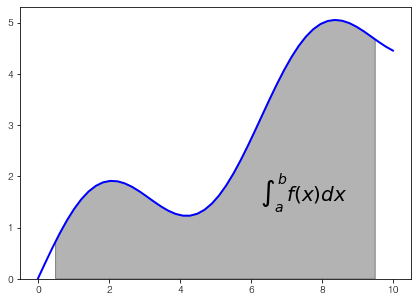

In [14]:
import scipy.integrate as sci
def f(x):
    return np.sin(x)+0.5 * x
a = 0.5 #0.5~9.5사이의 폴리곤을 그렸다.
b = 9.5
x = np.linspace(0,10)
y = f(x)

from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)
lx = np.linspace(a,b) #a에서 b사이의값
ly = f(lx) #함수에 의해서 그려진값 -> 면적을 내면 적분값이 된다.
#좌표값으로 구성
verts = [(a,0)]+list(zip(lx,ly))+[(b,0)]
poly = Polygon(verts,facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75*(a+b), 1.5, r"$\int_a^b f(x)dx$",horizontalalignment='center', fontsize=20)

In [15]:
xi = np.linspace(0.5, 9.5, 25)
sci.simps(f(xi),xi) #면적을 내준다.

24.37496418455075

In [16]:
from scipy import interpolate
x = np.linspace(0,4,12)
y = np.cos(x**2/3+4)
print(x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


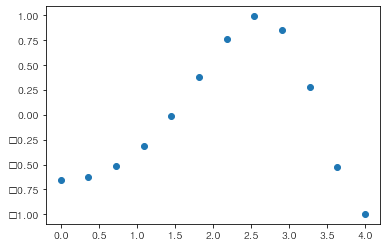

In [17]:
plt.plot(x,y,'o')
plt.show()

In [18]:
from scipy.interpolate import interp1d
#보간법 적용, 보간법 = 없는 데이터에 대해서 어떻게 추정할 것인가.
f1 = interp1d(x,y, kind='linear') #직선으로 추정
f2 = interp1d(x,y, kind='cubic') #spline 보간법(곡선보간법)을 이용해서 곡선으로 부드럽게 표현된다.
f3 = interp1d(x,y, kind='nearest') #더 근접한 놈으로 같다고 본다.

C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


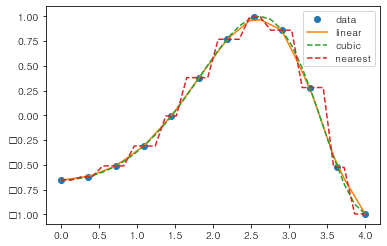

In [19]:
xnew = np.linspace(0,4,30)
plt.plot(x,y,'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '--') #3개를 통합해서 출력
plt.legend(['data','linear','cubic','nearest'], loc='best')

In [20]:
from sklearn.datasets import make_regression #sklearn = scikit패키지, make_regression = 회귀용으로 사용할 수 있도록 데이터 생성
import statsmodels.api as sm
bias = 100
XO,y,w = make_regression( #bias(target으로 부터 멀어진 정도), variance(분산)
n_samples=200, n_features=1, bias=bias, noise=100, coef=True, random_state=1)
print(XO[:5,:]) #XO = 독립변수
X = sm.add_constant(XO) #상수항을 자동으로 고려하지 않기 때문에 상수항을 추가
y = y.reshape(len(y),1) #수평으로 되어있는 데이터를 수직으로 되게
print(X.shape) #상수항을 추가해줘서 2개
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
(200, 2)
86.44794300545998


In [21]:
model = sm.OLS(y,X) #ordinaty least square : 최소제곱법으로 다중선형회귀
result = model.fit() #오차가 가장 작을때의 기울기+절편
print(result.summary())
#가장 일반화가 잘된 모델을 선정
#변수가 많아지면 설명력이 올라가기 때문에 그것을 고려한 adjust 결정계수를 보게된다.
#Log-Likelihood 우도값 <- MLE에 의해 구해진다.(최대우도법)

# AIC-모델복잡도,모델(분포)차이값, 모델을 비교할 때 사용한다.k(변수개수)가 커지면 커지는 경항이 있어 BIC가 그것을 보완한다.
#실제 수집된 데이터의 분포와 추정된 데이터의 분포값의 차이값
#AIC = 2(log-likelihood)+2k -> bias, variance를 결정한다.
#BIC 변수가 작은것을 기준으로 할때는 BIC를 본다.
# 모델복잡도가 증가하면 training error가 감소하면서 bias가 감소(target에 근사해 간다.)
# 모델복잡도가 증가하면 variance는 감소하다 최적점을 통과하면 증가하기 시작함(과적합)

#선형회귀 -> 모집단의 분포값(평균, 표준편차를 추정하게 된다.) -> 정규분포식 -> 우도값
#선형회귀의 (잔차의)전제조건 : 선형성, 정규성(Omnibus,Jarque-Bera), 등분산성, 독립성(다중공산성VIF), 자기상관성(Durbin-Watson)

#Omnibus :1-완전정규성
#Durbin-Watson:자기상관성이 있는지 2와 가까울수록

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.27e-25
Time:                        15:27:31   Log-Likelihood:                -1201.8
No. Observations:                 200   AIC:                             2408.
Df Residuals:                     198   BIC:                             2414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.9151      7.048     13.893      0.0

In [22]:
from pandas import DataFrame
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]       
                } 

In [ ]:
import pandas as pd
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
X = df[['Interest_Rate','Unemployment_Rate']]
Y = df['Stock_Index_Price']
X = sm.add_constant(X) #상수를 추가 해주어야한다.
model = sm.OLS(Y,X).fit()
result = model.summary()
print(result)

In [27]:
#상관분석
#pandas 상관분석 - corr, cov
#numpy 상관분석 - correlate, corrcoef
#scipy 상관분석 - scipy.stats.pearsonr , spearmanr

In [28]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov
seed(1)
data1 = 20*randn(1000)+100 #임의의 데이터 생성
data2 = data1+10*(randn(1000)+50)
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [30]:
from scipy.stats import pearsonr #상관계수
corr, _ = pearsonr(data1, data2) #_참조하고 싶지 않을때
print("피어슨 상관계수 : %.3f"%corr)

피어슨 상관계수 : 0.888


            Rank         GP      goals     assist      points        +/-  \
count  30.000000  30.000000  30.000000  30.000000   30.000000  30.000000   
mean   15.500000  77.733333  29.266667  45.466667   74.733333   7.500000   
std     8.803408   6.169633   8.106759   9.235364    8.501251  18.554208   
min     1.000000  59.000000  11.000000  28.000000   65.000000 -35.000000   
25%     8.250000  76.250000  24.000000  40.000000   69.000000  -5.750000   
50%    15.500000  80.000000  28.000000  43.000000   71.000000   9.000000   
75%    22.750000  82.000000  34.000000  49.750000   79.000000  20.750000   
max    30.000000  82.000000  51.000000  68.000000  104.000000  39.000000   

             PIM        PPG        PPP        SHG        SHP         GW  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   39.200000   8.266667  23.900000   0.333333   0.633333   5.000000   
std    15.968503   4.217642   7.567398   0.711159   1.159171   2.363516   
min    10.00000

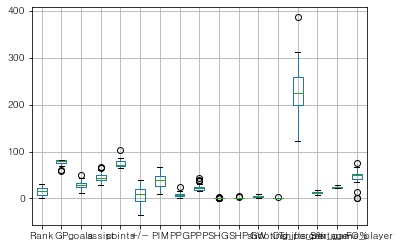

In [62]:
#G/A/P열의 상관관계를 확인하시오
#S열의 분포도를 그리시오
#각데이터의 상관관계가 있는지 그래프로 확인하시오
from scipy.stats import pearsonr 
import pandas as pd
import numpy as np
#다음 데이터를 로딩하시오
data = pd.read_csv('football.csv')
data = data.iloc[:,1:]

#열이름을 변경하시오
 #P:points, G:goals, A:assist, S:shooting_percentage, Shit/GP:shifts_per_game_player
col_rename = {'P':'points','G':'goals','A':'assist','S':'shooting_percentage','Shift/GP':'shifts_per_game_player'}
data_rename = data.rename(columns=col_rename)

#위의 데이터중 points, goals, assist, shooting_percentage, shifts_per_game_player 만 별도의 화일에 저장하시오
back = data_rename[['points','goals','assist','shooting_percentage','shifts_per_game_player']]
back.to_csv('back.csv')

#각열의 기술통계치를 출력하고 이상치를 확인하시오
print(data_rename.describe())
print(data_rename.boxplot())

#각열중 shifts_per_game_player, points, goals, assist열만 출력하는 함수를 작성하시오
def select_player(x):
    re = pd.DataFrame(x,columns={'shifts_per_game_player','points','goals','assist'})
    return re
select_player(data_rename)
data_rename.loc[:,['shifts_per_game_player','points','goals','assist']]

# 75<points<=80인 사람만 출력하는 함수를 작성하고 실행하시오
def point_75(x):
    a = x.where(x['points']>75)
    a = a.where(a['points']<80)
    b = a.dropna()
    return select_player(b)
point_75(df)
data1 = data_rename['points']>75
data2 = data_rename['points']<=80
print(data_rename[data1&data2])

#goals<40 이고 points<80인 선수를 출력하시오
def goals_40(x):
    a = x.where(x['goals']>40)
    a = a.where(x['goals']<80)
    b = a.dropna()
    return select_player(b)
goals_40(df)
data1 = data_rename['goals']>40
data2 = data_rename['points']<80
print(data_rename[data1&data2])

#assist와 goals간의 상관관계를 확인하고 회귀식을 구하시오
corr = pearsonr(data_rename['assist'], data_rename['goals'])
print(corr)
model = sm.OLS(data_rename['assist'], data_rename['goals'])
result = model.fit() 
print(result.summary())

          points     goals    assist
points  1.000000  0.382332  0.584901
goals   0.382332  1.000000 -0.525854
assist  0.584901 -0.525854  1.000000


C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


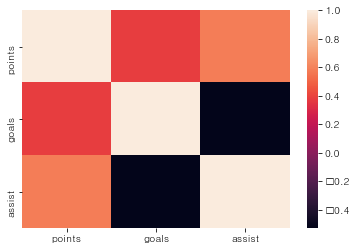

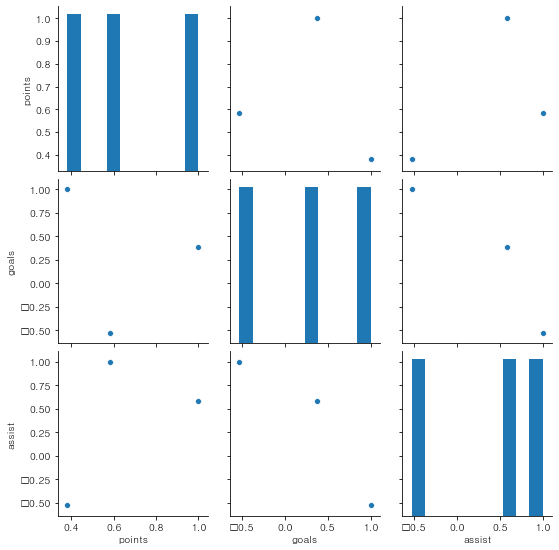

In [90]:
#G/A/P열의 상관관계를 확인하시오
data_1 = data_rename[['points','goals','assist']]
co = data_1.corr() #기본은 method=pearson이다.
print(co)
import seaborn as sns
sns.heatmap(co)
plt.show() #상관관계를 히트맵으로 표현하였다.
sns.pairplot(co)

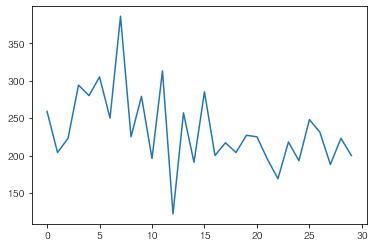

<Figure size 432x288 with 0 Axes>

In [93]:
#S열의 분포도를 그리시오
plt.plot(data_rename['shooting_percentage'])
plt.show()
plt.savefig('player.png')#그래프를 이미지로 저장

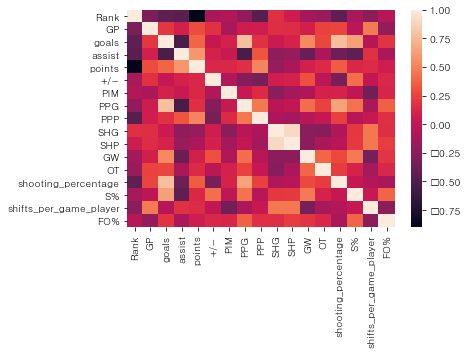

In [92]:
#각데이터의 상관관계가 있는지 그래프로 확인하시오
co2 = data_rename.corr()
sns.heatmap(co2)
plt.show()

(-0.5258542550287959, 0.00284049342176849)
                                 OLS Regression Results                                
Dep. Variable:                 assist   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              157.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                    2.95e-13
Time:                        16:50:19   Log-Likelihood:                         -129.72
No. Observations:                  30   AIC:                                      261.4
Df Residuals:                      29   BIC:                                      262.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

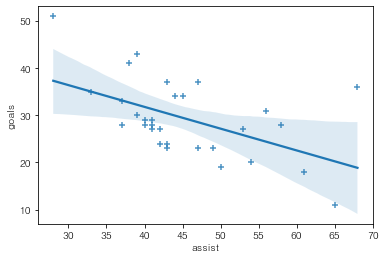

In [97]:
#assist와 goals간의 상관관계를 확인하고 회귀식을 구하시오
corr = pearsonr(data_rename['assist'], data_rename['goals'])
print(corr)
model = sm.OLS(data_rename['assist'], data_rename['goals'])
result = model.fit() 
print(result.summary())
sns.regplot('assist','goals',data=data_rename, marker='+') #회귀선

array([70.24490979, 98.3428737 , 56.19592783, 28.09796392])

C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


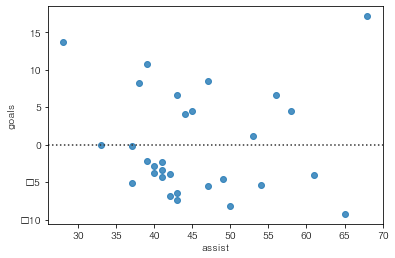

In [98]:
sns.residplot('assist','goals',data=data_rename) #잔차그래프
#goals수가 [50,70,40,20]일 때의 예측
result.predict([50,70,40,20])

In [99]:
#seaborn 그래픽 출력 패키지
#분석관련 그래프 - 회귀분석, 상관분석, 시계열분석, 분포출력
    #회귀분석 - regplot(회귀그래프), residplot(잔차그래프), lmplot(regplot+FacrtGrid(화면분할))여러개 출력할 때 사용 
    #상관분석 - pairplot, jointplot(상관+다양그래프 결합)
    #시계열분석 - lineplot
    #분포출력 - distplot
#차원으로 정리 
    #분석데이터가 모두 실수인 경우
    #분석데이터가 모두 범주형인 경우 - heatmap
    #분석데이터가 실수형과 범주형이 섞인경우
        #barplot, boxplot, pointplot, violinplot, stripplot, swarmplot
    #1차원 데이터 : rugplot(밀도(노이즈를 줘서 좀넓게 보이게하는것)), kdeplot(곡선으로 보여주게함,보간법이용), distplot
    #3차원 데이터 : 주로 색깔을 이용해서 hue를 이용해서 컬러로 3차원을 표현

In [102]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
flights = sns.load_dataset('flights')
print(flights.head())
flights.shape

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


(144, 3)

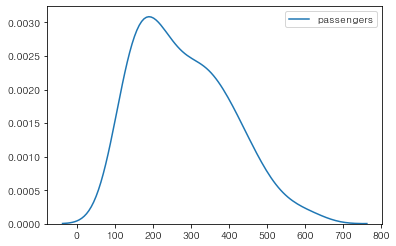

In [106]:
sns.kdeplot(flights.passengers)

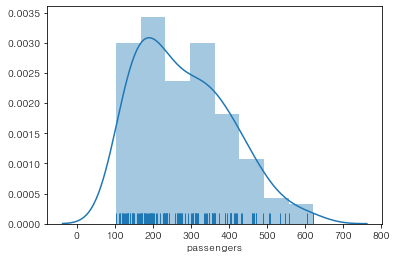

In [113]:
sns.distplot(flights.passengers, kde=True, rug=True)
#kde=True 없는 데이터도 출력하겠다.(보간법)

In [114]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


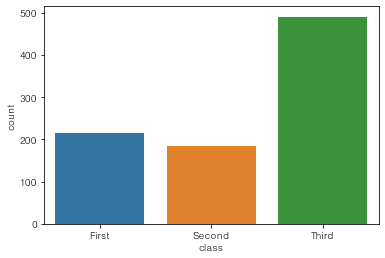

In [115]:
sns.countplot(x='class',data=titanic) #선실별 사람수가 카운트 된다.

In [116]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


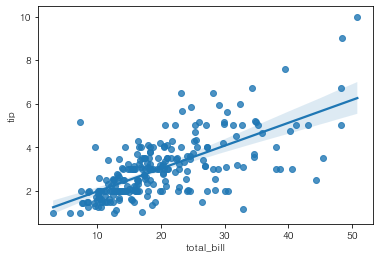

In [117]:
sns.regplot(x='total_bill',y='tip',data=tips) #회귀선을 통해 추이를 볼 수 있다.

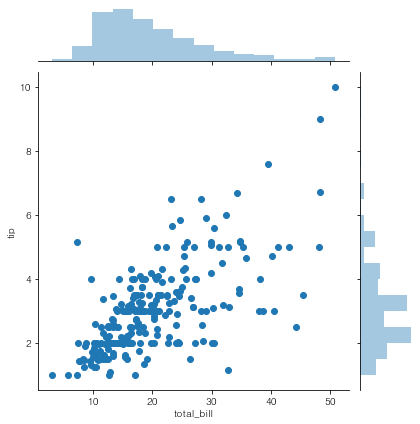

In [118]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#분포도와 히스토그램이 합쳐져서 나온다.

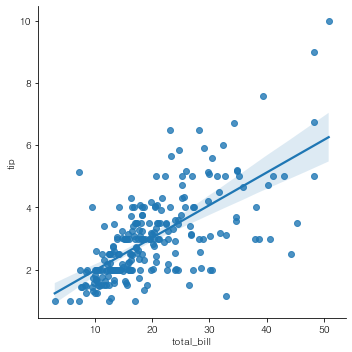

In [119]:
sns.lmplot(x='total_bill',y='tip', data=tips)

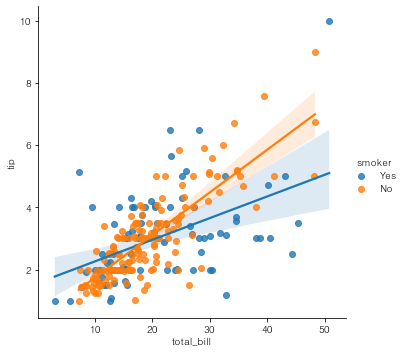

In [120]:
sns.lmplot(x='total_bill',y='tip', hue='smoker', data=tips) #hue를 통해 3차원으로 표현